# 回帰タスクをFlux.jlで解く

潜在モデルからのデータに基づき、パラメータ推定を行う。

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [1]:
using Flux
using Plots
gr()
using Random
Random.seed!(1)

TaskLocalRNG()

## 潜在関数 (推定対象)

In [2]:
std = 0.5 
f(x) = 5.0*exp(-2.0*x) + 1.5 

f (generic function with 1 method)

## 観測データの生成

In [3]:
range = 0:0.1:1.0
Y = [f(x) + std*randn() for x in range]
DATA = zip(range, Y)

zip(0.0:0.1:1.0, [6.464708430523051, 5.859392142281507, 4.44817406717484, 5.4725538474617785, 4.329081857349868, 3.4731794151716544, 3.8809379058251334, 2.3199744237483833, 1.9881063810277282, 2.1619275181797306, 1.935550458478506])

## 指数関数モデルと訓練関数

In [4]:
p = [1.0,1.0, 1.0]
g(x,p) = p[1]*exp(-p[2]*x)+p[3]
opt = Flux.ADAM(0.4) 
loss(x,y) = (x-y)^2 
function train(data, p)
    ps = Flux.params(p)
    for d in data
        gs = Flux.gradient(ps) do
            y = d[2]
            y_hat = g(d[1],p)
            loss(y, y_hat)
        end
        Flux.Optimise.update!(opt, ps, gs)
    end
end
for i in 1:10
    train(DATA, p)
end

## 学習結果の描画

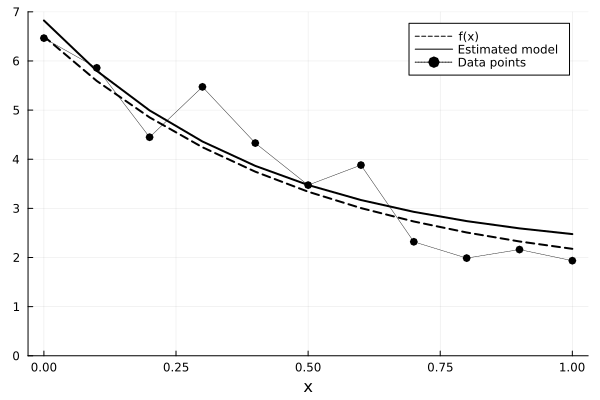

In [5]:
plot(range, f, ylims=[0,7], label="f(x)", lw=2, color=:black, ls=:dash, xlabel="x")
plot!(range, x->g(x,p), label="Estimated model", lw=2, color=:black)
plot!(range, Y, label="Data points", color=:black, marker=:o, lw=0.5, ls=:dot )

In [6]:
println(p)

[4.771300066917676, 2.41962637650207, 2.0521957370242174]


In [7]:
savefig("regression.pdf")